In [131]:
import os
import pandas as pd
from indicnlp.tokenize import indic_tokenize  
from googletrans import Translator
import spacy
import re
import html
from spacy.lang.hi import STOP_WORDS as STOP_WORDS_HI
from indicnlp.tokenize import indic_tokenize

re1 = re.compile(r' +')
data_path = "hindi_dataset"

In [132]:
def get_train_test_from_tsv(tsv_name):
    df = pd.read_csv(tsv_name, delimiter='\t')
    print("Dataset Shape: {}".format(df.shape))
    X_raw = df['text']
    Y_raw = df['task_1']
    return X_raw, Y_raw

In [182]:
data_path="hindi_dataset"
X_, Y_ = get_train_test_from_tsv(
    os.path.join(data_path, 'hasoc_19_gold.tsv'))
X_o=[]
X_n=[]
for i ,j in zip(X_,Y_):
    if j=="NOT":
        X_n.append(i)
    else:
        X_o.append(i)

Dataset Shape: (1318, 5)


In [183]:
len(X_o)

605

In [184]:
len(X_n)

713

In [185]:
data_path="hindi_dataset"
X_, Y_ = get_train_test_from_tsv(
    os.path.join(data_path, 'hasoc_19_train.tsv'))

Dataset Shape: (4665, 5)


In [186]:
X_o=[]
X_n=[]

In [187]:
for i ,j in zip(X_,Y_):
    if j=="NOT":
        X_n.append(i)
    else:
        X_o.append(i)

In [188]:
len(X_o)

2469

In [189]:
len(X_n)

2196

In [192]:
count_ht = 0
count_sent = 0
for i in X_o:
    sht = re.findall(r"#", i)
    if sht:
        count_sent+=1
    count_ht +=len(sht)

In [193]:
count_sent

517

In [139]:
count_ht

1399

In [194]:
count_ht = 0
count_sent = 0
for i in X_n:
    sht = re.findall(r"#", i)
    if sht:
        count_sent+=1
    count_ht +=len(sht)

In [195]:
count_sent

975

In [141]:
count_ht

2436

In [202]:
count_url = 0
count_sent = 0
for i in X_o:
    sht = re.findall(r"http", i)
    if sht:
        count_sent+=1
    count_url +=len(sht)

In [203]:
count_url

58

In [204]:
count_sent

54

In [205]:
count_url = 0
count_sent = 0
for i in X_n:
    sht = re.findall(r"http", i)
    if sht:
        count_sent+=1
    count_url +=len(sht)

In [206]:
count_url

236

In [207]:
count_sent

229

In [147]:
from collections import Counter
oh=Counter()
for line in X_o:
    line = line
    tokens = indic_tokenize.trivial_tokenize(line)
    l = len(tokens)
    i=0
    while i <l:
        if tokens[i]=="#":
            i=i+1
            oh[tokens[i]]+=1
        i=i+1

In [148]:
oh.most_common()[:10]

[('नीच', 90),
 ('कमीने', 73),
 ('कुत्ते', 73),
 ('प्रज्ञा', 39),
 ('कन्हैया', 18),
 ('TempleTerrorAttack', 14),
 ('मोदी', 13),
 ('देश', 9),
 ('गोडसे', 9),
 ('जय', 8)]

In [149]:
oh.most_common()[-10:]

[('राज', 1),
 ('ज्योतिरादित्य', 1),
 ('WhoAreYou', 1),
 ('CEC', 1),
 ('कांग्रेसियों', 1),
 ('Lynchistaan', 1),
 ('India', 1),
 ('पगली', 1),
 ('नेहरू', 1),
 ('जवाहर', 1)]

In [150]:
from collections import Counter
on=Counter()
for line in X_n:
    tokens = indic_tokenize.trivial_tokenize(line)
    l = len(tokens)
    i=0
    while i <l:
        if tokens[i]=="#":
            i=i+1
            if i==l:
                break
            on[tokens[i]]+=1
        i=i+1

In [151]:
on.most_common()[:20]

[('हिंदी', 81),
 ('नीच', 58),
 ('बज़्म', 54),
 ('कुत्ते', 53),
 ('शब्दनिधि', 52),
 ('प्रज्ञा', 52),
 ('कमीने', 51),
 ('CWC19', 39),
 ('लक्ष्मीबाई', 35),
 ('जय', 27),
 ('कन्हैया', 24),
 ('शुभ', 24),
 ('AIMIM', 23),
 ('INDvBAN', 18),
 ('दोस्त', 18),
 ('MannKiBaat', 17),
 ('INDvENG', 17),
 ('हिन्दी', 16),
 ('ICCWorldCup2019', 16),
 ('मोदी', 16)]

In [152]:
on.most_common()[-10:]

[('सिमरन', 1),
 ('गौतमी', 1),
 ('जवान', 1),
 ('विमान', 1),
 ('हरामखोर', 1),
 ('सेना', 1),
 ('वोट', 1),
 ('Trump', 1),
 ('G20', 1),
 ('StandWithAMU', 1)]

In [216]:
from collections import Counter
to=Counter()
to_len=0
for line in X_o:
    tokens = indic_tokenize.trivial_tokenize(line)
    tokens = [t for t in tokens if t not in STOP_WORDS_HI and not t.isnumeric() and not t.isalpha() and not t.isalnum()]
    tokens = [t for t in tokens if t.isidentifier()]
    tokens = [hi_stem(t) for t in tokens]
    to_len +=len(tokens)
    for t in tokens:
        to[t]+=1
#     l = len(tokens)
#     i=0
#     while i <l:
#         if tokens[i]=="#":
#             i=i+1
#             if i==l:
#                 break
#             on[tokens[i]]+=1
#         i=i+1

In [218]:
to_len/len(to)

5.770541401273885

In [172]:
to.most_common()[:20]

[('क्य', 510),
 ('_', 497),
 ('नह', 405),
 ('हराम', 401),
 ('तेर', 385),
 ('दे', 302),
 ('रह', 293),
 ('साल', 286),
 ('लोग', 246),
 ('बोल', 243),
 ('देश', 239),
 ('रंड', 236),
 ('कर', 235),
 ('तू', 221),
 ('लग', 210),
 ('वो', 209),
 ('तुम', 201),
 ('जा', 200),
 ('ले', 189),
 ('भड़व', 188)]

In [173]:
to.most_common()[-10:]

[('ज़कात', 1),
 ('नापाक', 1),
 ('कतर', 1),
 ('इंसा', 1),
 ('डायपर', 1),
 ('तुमप', 1),
 ('महाचूतिय', 1),
 ('मचाय', 1),
 ('फरिश्', 1),
 ('कीत', 1)]

In [219]:
from collections import Counter
tn=Counter()
tn_len=0
for line in X_n:
    tokens = indic_tokenize.trivial_tokenize(line)
    tokens = [t for t in tokens if t not in STOP_WORDS_HI and not t.isnumeric() and not t.isalpha() and not t.isalnum()]
    tokens = [t for t in tokens if t.isidentifier()]
    tokens = [hi_stem(t) for t in tokens]
    tn_len+=len(tokens)
    for t in tokens:
        tn[t]+=1

In [222]:
tn_len/len(tn)

4.8556013963821005

In [175]:
tn.most_common()[:20]

[('_', 986),
 ('जी', 272),
 ('क्य', 271),
 ('रह', 220),
 ('दे', 207),
 ('जा', 202),
 ('नह', 193),
 ('कर', 186),
 ('देश', 180),
 ('लोग', 175),
 ('बन', 173),
 ('देख', 168),
 ('वो', 158),
 ('भारत', 154),
 ('लग', 139),
 ('ले', 137),
 ('आपक', 136),
 ('हिंद', 128),
 ('वाल', 127),
 ('सरकार', 126)]

In [176]:
tn.most_common()[-20:]

[('गिद्दड़', 1),
 ('बिरल', 1),
 ('टाट', 1),
 ('स्क', 1),
 ('बजेप', 1),
 ('जिगलाल', 1),
 ('गलतफहम', 1),
 ('पैदायश', 1),
 ('वैर', 1),
 ('अंग्रेजीद', 1),
 ('मोहर', 1),
 ('राजभाष', 1),
 ('काउंट', 1),
 ('ब्रिगेड', 1),
 ('शिक्षण', 1),
 ('जेनय', 1),
 ('सुनियोजित', 1),
 ('स्टूडेंट्स', 1),
 ('उगल', 1),
 ('परशुराम', 1)]

In [160]:
from wordcloud import WordCloud

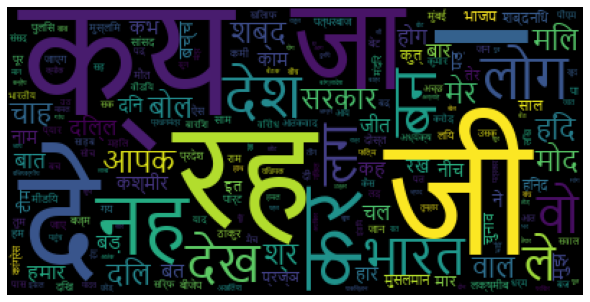

In [180]:
wc = WordCloud(font_path="Nirmala.ttf").generate_from_frequencies(tn)
import matplotlib.pyplot as plt 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show()
plt.savefig(os.path.join("results","nonoff_top_words"))

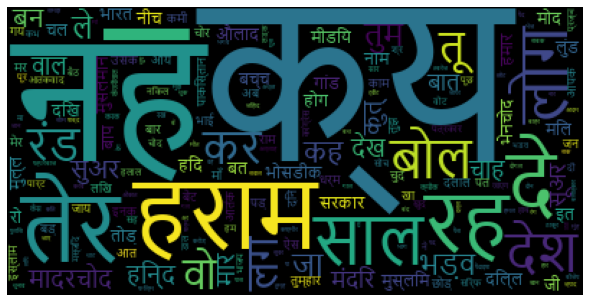

In [181]:
wc = WordCloud(font_path="Nirmala.ttf").generate_from_frequencies(to)
import matplotlib.pyplot as plt 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show()
plt.savefig(os.path.join("results","off_top_words"))

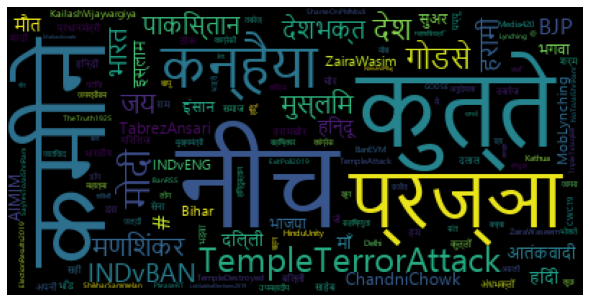

In [167]:
wc = WordCloud(font_path="Nirmala.ttf").generate_from_frequencies(oh)
import matplotlib.pyplot as plt 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show()
plt.savefig(os.path.join("results","off_hashtag"))

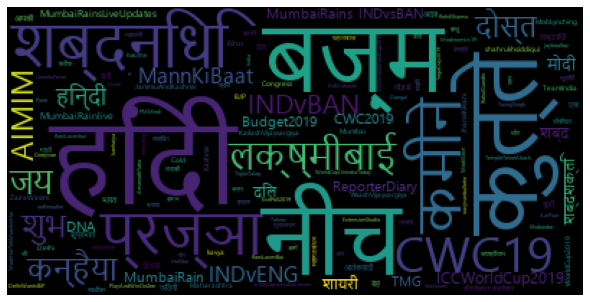

In [166]:
wc = WordCloud(font_path="Nirmala.ttf").generate_from_frequencies(on)
import matplotlib.pyplot as plt 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 
plt.savefig(os.path.join("results","nonoff_hashtag"))

In [208]:
len(to)

6280

In [209]:
len(tn)

6302

In [211]:
o_set=set(to.keys())

In [212]:
n_set=set(tn.keys())

In [214]:
len(o_set.intersection(n_set))

2931

In [215]:
o_set.intersection(n_set)

{'भीड',
 'न्युज',
 'मुसलमान',
 'चाटुकारि',
 'प्रभावित',
 'संगठन',
 'तबरेज',
 'पड़',
 'संज्ञान',
 'पुजार',
 'कार्रव',
 'वास',
 'मानव',
 'हुनर',
 'शाम',
 'चूक',
 'निराश',
 'ख़रीद',
 'औरत',
 'बट',
 'मनुवाद',
 'अंग्रेज़',
 'कमर',
 'बस',
 'रहिय',
 'बुक',
 'कास्ट',
 'जुर्म',
 'मा',
 'विजयमालिय',
 'जयचंद',
 'लङ',
 'दाऊद',
 'निर्दोष',
 'हुक्म',
 'हाई',
 'कायम',
 'न्य',
 'लंब',
 'किए',
 'तब्दील',
 'बेरोज़गार',
 'ज़िंदाबाद',
 'आर्म',
 'सर',
 'पहचान',
 'दब',
 'आंध',
 'दु',
 'बच्च',
 'दिख',
 'माइनर',
 'जाऊँ',
 'कचर',
 'यंह',
 'शेष',
 'जंग',
 'हमस',
 'सिनेम',
 'धुल',
 'ज़ोर',
 'तत्कालीन',
 'भाभ',
 'हिफाजत',
 'सिख',
 'इशार',
 'बंगाल',
 'गर्भव',
 'चेक',
 'कसाब',
 'मेहबूब',
 'बल्लेबाज',
 'अंसार',
 'नै',
 'इनस',
 'मणिशं',
 'उर्द',
 'रौशन',
 'राजीव',
 'असहिष्णु',
 'एजुकेशन',
 'इसलिय',
 'चट',
 'शासन',
 'सुरश',
 'प्रकार',
 'ताक',
 'मार्च',
 'शरारत',
 'मुसलम',
 'भूख',
 'गर्ल',
 'दोबार',
 'पुछ',
 'करा',
 'दुआ',
 'कडून',
 'ट्वीट',
 'गाँव',
 'तुम्हार',
 'ढोंग',
 'ख़िलाफ़',
 'अकेल',
 'प्रसारण',
 'मृत्य',
 'पाय